Group 26 group project Final Report

Group 26 Group Members: Henil Agrawal, Xiaotao Feng, Nadav Segev, Carter Yam 

Title: Predictive Analysis of Diabetes Risk Among Female Pima Indians Over 21 Using KNN Classification

# Introduction

Diabetes, a prevalent chronic condition, significantly impacts millions annually. According to the World Health Organization report (2023), diabetes prevalence surged from 108 million to 422 million between 1980 and 2014. In the United States, gestational diabetes affects 2% to 10% of pregnancies annually, as reported by the Centers for Disease Control and Prevention (CDC) in 2022.

Researchers have explored various factors like age, family history, and ethnicity to unravel the intricacies of diabetes. A pivotal study by King et al. (1993) highlighted varying diabetes prevalence, underscoring the profound influence of ethnicity. Researchers have also focused on the surge of diabetes among the Pima Indians in the mid-20th century. A 2019 study by Bashir et al. revealed a 1.7 times higher risk of diabetes development in women with 1-3 pregnancies, based on an analysis of 768 Pima Indian females over 21.

To gain a deeper understanding of factors influencing diabetes in this specific female ethnic group, we used a dataset focused on Pima Indian females aged over 21. Comprising 768 observations, this dataset includes predictors like glucose concentration, blood pressure levels, and a categorical variable indicating diabetes status (Bashir et al., 2019).

Our project's core objective is to anticipate diabetes occurrence among female Pima Indians aged over 21 using the KNN (K-Nearest Neighbors) classification method. Beyond statistical trends, ongoing research explores lifestyle choices, genetic predispositions, and environmental factors for a comprehensive understanding of diabetes etiology.The global perspective on diabetes involves socioeconomic factors, healthcare access, and cultural nuances shaping diabetes outcomes. Bridging knowledge from CDC findings on gestational diabetes with cultural considerations provides a holistic framework for research. The focus on the mid-20th century surge among the Pima Indians adds another layer, unveiling specific vulnerabilities.

Our project leverages a dataset focused on Pima Indian females aged over 21, with eight predictors, to position our investigation at the forefront of understanding and predicting diabetes within this unique demographic. The KNN classification method is employed to discern subtle patterns within the dataset, aiming to make a substantive contribution to effective diabetes prediction and management strategies within this distinct demographic.

In [47]:
install.packages("cowplot")
install.packages("janitor")
install.packages("gridExtra")
install.packages("kknn")
library(tidyverse)
library(tidymodels)
library(cowplot)
library(repr)
library(stringr)
library(janitor)
library(gridExtra)
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [48]:
# Reading the dataset "diabetes"

url <- "https://raw.githubusercontent.com/Nadav-Seg/dsci-100-2023w1-group-26/main/diabetes.csv"
diabetes <- read_csv(url, col_names = TRUE)
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


Table 1: Top 6 rows of our dataset Diabetes

The columns in the dataset are (variable names in bracket represents column names after date cleaning below):

- Pregnancies (pregnancies)- Number of times pregnant
- Glucose (glucose)- Plasma glucose concentration, 2 hours in an oral glucose tolerance test
- BloodPressure (blood_pressure) - Diastolic blood pressure (mm Hg)
- SkinThickness (skin_thickness)- Triceps skin fold thickness (mm)
- Insulin (insulin) - 2-Hour serum insulin (mu U/ml)
- BMI (bmi) - Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction (diabetes_pedigree_function) - Diabetes pedigree function
- Age (age) - Age (years)
- Outcome (outcome) - Class variable to be predicted (0 or 1, 0 means no diagnosed with diabetes while 1 means being diagnosed with diabetes)

# Methods

Our data analysis begins with data cleaning. Including variable names cleaning in the dataset and wrangling the data: omitting ‘NA’ values from the dataset, converting data types in the dataset, and refactoring the ‘outcome’ response variable to be represented by either the word “Confirmed” for a person having diabetes, or “Healthy” for a person who does not have diabetes. This transformation enhances the interpretability and readability of the response variable compared to a binary representation of 0s and 1s as seen through Table 1 to Table 3 below.

## Cleaning and Wrangling the Diabetes Dataset

In [49]:
# Cleaning the column names

diabetes <- diabetes |> clean_names()
head(diabetes)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


Table 2: Top 6 rows of our dataset Diabetes with cleaned variable names

In [50]:
# Wrangling the data

diabetes <- diabetes |> mutate(outcome = as_factor(`outcome`), 
                               age = as.integer(`age`), 
                               pregnancies = as.integer(`pregnancies`)) |> 
            mutate(outcome = fct_recode(`outcome`, "Confirmed" = "1", "Healthy" = "0")) |>
            na.omit()
head(diabetes)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
6,148,72,35,0,33.6,0.627,50,Confirmed
1,85,66,29,0,26.6,0.351,31,Healthy
8,183,64,0,0,23.3,0.672,32,Confirmed
1,89,66,23,94,28.1,0.167,21,Healthy
0,137,40,35,168,43.1,2.288,33,Confirmed
5,116,74,0,0,25.6,0.201,30,Healthy


Table 3: Top 6 rows of our dataset Diabetes with wrangled data

## Performing Variable selection and Preliminary Analysis on the Dataset

Subsequent exploratory data analysis involves computing the count of observations with a "Confirmed" or "Healthy" outcome, revealing 201 and 375 instances, respectively (Table 4).  We delve further by summarizing the data by computing the mean (Table 5.1), maximum (Table 5.2), and minimum (Table 5.3) values for each predictor variable under investigation, grouped by outcome.

We will consider 6 of the 8 variables as our predictor variables: glucose levels, blood pressure, skin fold thickness, BMI, age, and number of pregnancies. These variables were chosen for their balanced distributions and minimized skewness without significant outliers, ensuring a more robust analysis. We also use age and number of times pregnant as we hypothesize that these variables might significantly impact the presence of diabetes although being skewed. The response variable, outcome, indicates diabetes presence in Pima Indians.  We excluded 'DiabetesPedigreeFunction' due to insufficient description in the dataset, and lack of details on how the pedigree levels are defined. We omitted 'Insulin' because of its reverse-causal relationship: individuals inject insulin due to having diabetes, making it irrelevant for predicting diabetes in new observations (Table 5).

In [51]:
# Setting the seed
# Splitting the diabetes data into a train and a test set

set.seed(2000)
diabetes_split <- initial_split(diabetes, prop = 0.75, strata = "outcome")
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)

In [52]:
# Counting the Number of Observations for Each Identified Class "Healthy" and "Confirmed"

observations_by_class <- diabetes_training |> 
                            group_by(`outcome`) |> 
                            summarize(number_of_observations = n())
observations_by_class

outcome,number_of_observations
<fct>,<int>
Healthy,375
Confirmed,201


Table 4: Number of observations grouped by "outcome"

- *As both classes are not largely imbalance with much more data points in one class, the data set doesn't require up-sampling for a certain class.*

In [53]:
# Find the average value of each Predictor Variables we chose to use for each class

Mean_values <- diabetes_training |> 
                select(-`insulin`, -`diabetes_pedigree_function`) |>
                group_by(`outcome`) |>
                summarize(across(`pregnancies`:`age`, mean)) 


# Find the maximum value of each Predictor Variables we chose to use for each class

Max_values <- diabetes_training |> 
                select(-`insulin`, -`diabetes_pedigree_function`) |>
                group_by(`outcome`) |>
                summarize(across(`pregnancies`:`age`, max)) 


# Find the minimum value of each Predictor Variables we chose to use for each class

Min_values <- diabetes_training |> 
                select(-`insulin`, -`diabetes_pedigree_function`) |>
                group_by(`outcome`) |>
                summarize(across(`pregnancies`:`age`, min))

Mean_values
Max_values
Min_values

outcome,pregnancies,glucose,blood_pressure,skin_thickness,bmi,age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Healthy,3.248000,109.7307,68.58400,20.04800,30.15040,31.42667
Confirmed,4.820896,140.2985,71.27861,22.33831,35.31144,36.54726


outcome,pregnancies,glucose,blood_pressure,skin_thickness,bmi,age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Healthy,13,194,122,54,57.3,81
Confirmed,15,199,114,99,67.1,70


outcome,pregnancies,glucose,blood_pressure,skin_thickness,bmi,age
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Healthy,0,0,0,0,0,21
Confirmed,0,0,0,0,0,21


Table 5: 

5.1 - Mean values for each variable selected group by the "outcome" variable

5.2 - Maximum values for each variable selected group by the "outcome" variable

5.3 - Minimum values for each variable selected group by the "outcome" variable

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


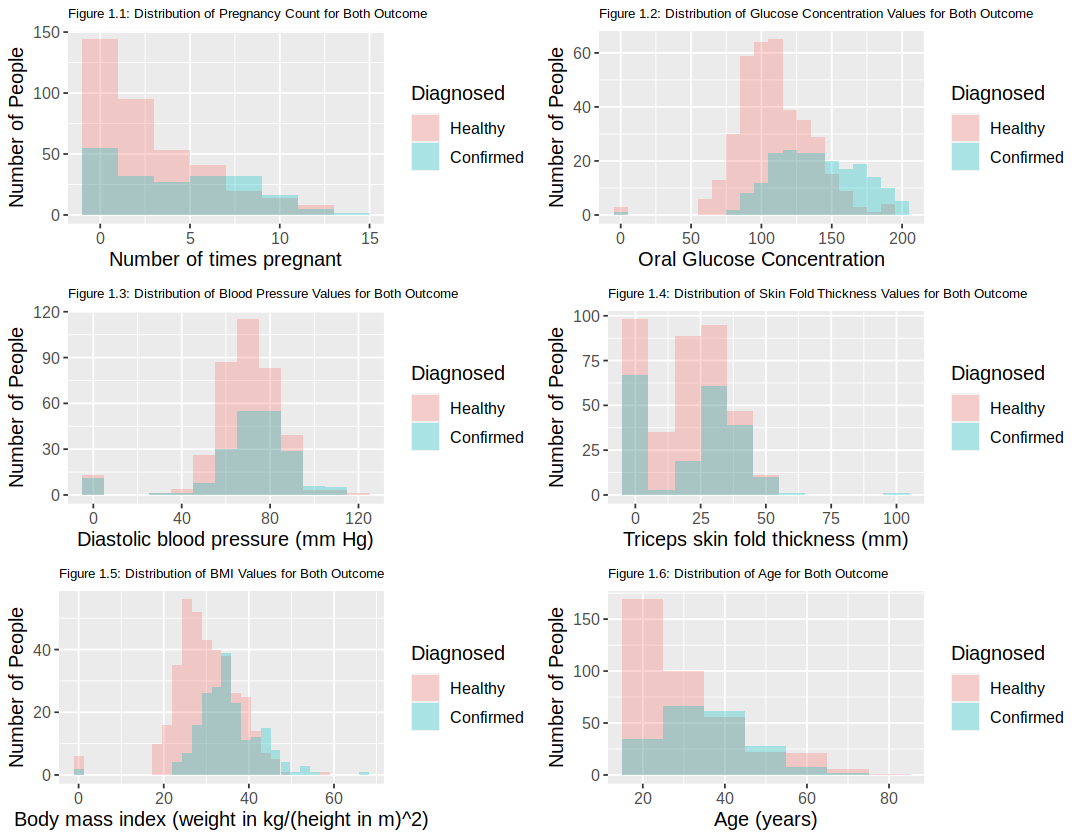

In [54]:
options(repr.plot.width = 9, repr.plot.height = 7)

# Distribution of values for the 6 variables chosen 
# The 6 variables are plotted in order: pregnancy, glucose_consentration, blood_pressure, skin_thickness, bmi, age


pregnancy_distribution <- ggplot(diabetes_training, aes(x = `pregnancies`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 2) +
                                        labs(x = "Number of times pregnant", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 1.1: Distribution of Pregnancy Count for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

glucose_concentration_distribution <- ggplot(diabetes_training, aes(x = `glucose`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 10) +
                                        labs(x = "Oral Glucose Concentration", y = "Number of People", fill = "Diagnosed") + 
                                        ggtitle("Figure 1.2: Distribution of Glucose Concentration Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

blood_pressure_distribution <- ggplot(diabetes_training, aes(x = `blood_pressure`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 10) +
                                        labs(x = "Diastolic blood pressure (mm Hg)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 1.3: Distribution of Blood Pressure Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

skin_thickness_distribution <- ggplot(diabetes_training, aes(x = `skin_thickness`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 10) +
                                        labs(x = "Triceps skin fold thickness (mm)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 1.4: Distribution of Skin Fold Thickness Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

bmi_distribution <- ggplot(diabetes_training, aes(x = `bmi`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity") +
                                        labs(x = "Body mass index (weight in kg/(height in m)^2)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 1.5: Distribution of BMI Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

age_distribution <- ggplot(diabetes_training, aes(x = `age`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 10) +
                                        labs(x = "Age (years)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 1.6: Distribution of Age for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

grid.arrange(pregnancy_distribution, glucose_concentration_distribution, blood_pressure_distribution, skin_thickness_distribution, bmi_distribution, age_distribution, nrow = 3)

In [55]:
# Creating a recipe and standardizing the data 
# Removing unwanted variables (insulin and diabetes_pedigree_function) as explained under "Methods" in the following part

diabetes_recipe <- recipe(`outcome` ~. , diabetes_training) |>
                    step_rm(`insulin`, `diabetes_pedigree_function`) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())


preprocessed_diabetes <- diabetes_recipe |> 
                        prep() |> 
                        bake(diabetes_training)


head(preprocessed_diabetes)

pregnancies,glucose,blood_pressure,skin_thickness,bmi,age,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.6462190,0.8814192,0.1296651,0.8900175,0.2086613,1.41701936,Confirmed
1.2328575,1.9990626,-0.2893369,-1.3110071,-1.0949885,-0.10244043,Confirmed
-1.1136966,0.5301599,-1.5463432,0.8900175,1.4110568,-0.01802600,Confirmed
-0.2337388,-1.3538675,-1.0225906,0.7013583,-0.1204153,-0.60892703,Confirmed
1.2328575,0.1469679,1.3866714,-1.3110071,-4.0440216,1.75467709,Confirmed
1.8194960,1.5200726,0.2344157,-1.3110071,0.7655603,0.06638843,Confirmed


Table 7: Top 6 rows of our dataset Diabetes with standardized values for each variable

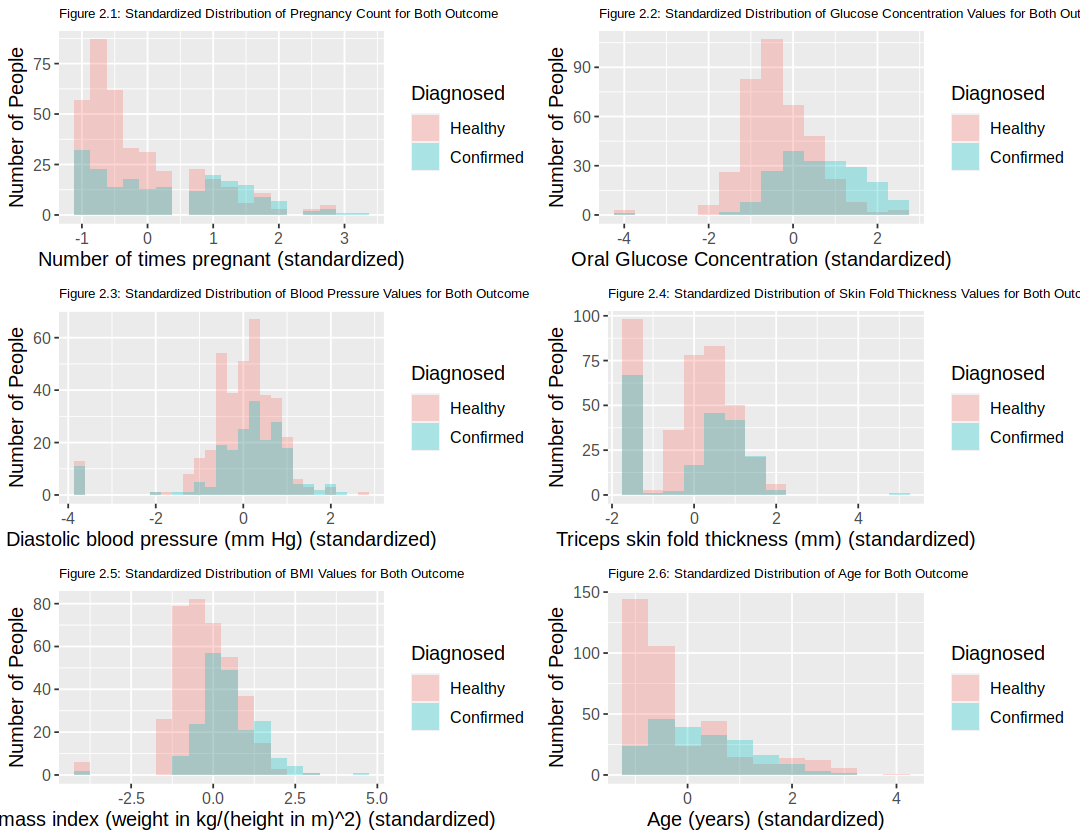

In [56]:
# Distribution of standardized values for the 6 variables chosen 
# The 6 standardized variables are plotted in order: pregnancy, glucose_consentration, blood_pressure, skin_thickness, bmi, age


pregnancy_distribution <- ggplot(preprocessed_diabetes, aes(x = `pregnancies`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 0.25) +
                                        labs(x = "Number of times pregnant (standardized)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 2.1: Standardized Distribution of Pregnancy Count for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

glucose_concentration_distribution <- ggplot(preprocessed_diabetes, aes(x = `glucose`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 0.5) +
                                        labs(x = "Oral Glucose Concentration (standardized)", y = "Number of People", fill = "Diagnosed") + 
                                        ggtitle("Figure 2.2: Standardized Distribution of Glucose Concentration Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

blood_pressure_distribution <- ggplot(preprocessed_diabetes, aes(x = `blood_pressure`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 0.25) +
                                        labs(x = "Diastolic blood pressure (mm Hg) (standardized)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 2.3: Standardized Distribution of Blood Pressure Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

skin_thickness_distribution <- ggplot(preprocessed_diabetes, aes(x = `skin_thickness`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 0.5) +
                                        labs(x = "Triceps skin fold thickness (mm) (standardized)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 2.4: Standardized Distribution of Skin Fold Thickness Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

bmi_distribution <- ggplot(preprocessed_diabetes, aes(x = `bmi`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 0.5) +
                                        labs(x = "Body mass index (weight in kg/(height in m)^2) (standardized)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 2.5: Standardized Distribution of BMI Values for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

age_distribution <- ggplot(preprocessed_diabetes, aes(x = `age`, fill = `outcome`)) +
                                        geom_histogram(alpha = 0.3, position = "identity", binwidth = 0.5) +
                                        labs(x = "Age (years) (standardized)", y = "Number of People", fill = "Diagnosed") +
                                        ggtitle("Figure 2.6: Standardized Distribution of Age for Both Outcome") +
                                        theme(text = element_text(size = 12), plot.title = element_text(size = 8))

grid.arrange(pregnancy_distribution, glucose_concentration_distribution, blood_pressure_distribution, skin_thickness_distribution, bmi_distribution, age_distribution, nrow = 3)

By looking at these summary tables and creating histograms of the distribution of these variables colored by “outcome” (Figure 1.1 to 1.6 and Figure 2.1 to 2.6), we notice that the data with the “Confirmed” outcome have higher mean values in all predictor variables and that all the distributions for the “Confirmed” outcome are centered further right on the plots than those of the “Healthy” outcome. Already, we can somewhat predict that these variables may in fact positively correlate with the outcome of diabetes.

## Performing Cross-Validation and KNN Analysis on the Training Set (1 to 18)

We will be developing multiple KNN-classification models, each utilizing distinct combinations of predictor variables. Our objective is to compare these models, discerning their prediction accuracies and identifying the most influential and effective predictor variables associated with diabetes in Pima Indian women.

The KNN-classification modeling process initiates with the creation of a model using all selected predictor variables, employing tune() for optimal neighbor selection. A table showcasing the best accuracy and the corresponding number of neighbors is presented. Following this, we create multiple different models with different combinations of predictor variables (using 2-3 predictor variables at a time in each model created). Model accuracies are scrutinized, guiding the identification of the most impactful predictor variables (highest model accuracy among the models created), then retain these variables and repeat this process, creating more models using the retained variables combined with other variables, to find the model with the highest accuracy. This iterative process continues, progressively refining the model (Table 7 to Table 24 below).

In [57]:
# Setting the seed
# Performing cross-validation using multiple combinations of predictor variables, while tuning the models with different values of K

set.seed(1234)
diabetes_vfold <- diabetes_training |> vfold_cv(v = 5, strata = `outcome`)
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

diabetes_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

In [58]:
# 1: Using All Predictor Variables Selected

diabetes_recipe_all <- recipe(`outcome` ~. , diabetes_training) |>
                        step_rm(insulin, diabetes_pedigree_function) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

diabetes_results_all <- workflow() |>
                        add_recipe(diabetes_recipe_all) |>
                        add_model(diabetes_tune_spec) |>
                        tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                        collect_metrics() |>
                        filter(.metric == "accuracy")

best_result_all <- diabetes_results_all |> 
                    slice_max(mean, n = 1) |> 
                    mutate(accuracy = mean) |> 
                    select(neighbors, accuracy)
     

best_result_all

neighbors,accuracy
<dbl>,<dbl>
9,0.7568816
10,0.7568816


Table 7: Best model accuracy with all predictors variables selected

In [59]:
# 2: Using "glucose", "blood_pressure", "skin_thickness" as Predictor Variables Selected

diabetes_recipe_gl_bp_st <- recipe(`outcome` ~ `glucose` + `blood_pressure` + `skin_thickness` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_gl_bp_st <- workflow() |>
                                add_recipe(diabetes_recipe_gl_bp_st) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_gl_bp_st <- diabetes_results_gl_bp_st |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
              

best_result_gl_bp_st

neighbors,accuracy
<dbl>,<dbl>
10,0.7308546


Table 8: Best model accuracy using "glucose", "blood_pressure", "skin_thickness" as predictor variables selected

In [60]:
# 3: Using "blood_pressure", "skin_thickness" as Predictor Variables Selected

diabetes_recipe_bp_st <- recipe(`outcome` ~ `blood_pressure` + `skin_thickness` , diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_bp_st <- workflow() |>
                            add_recipe(diabetes_recipe_bp_st) |>
                            add_model(diabetes_tune_spec) |>
                            tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                            collect_metrics() |>
                            filter(.metric == "accuracy")

best_result_bp_st <- diabetes_results_bp_st |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)
                        


# 4: Using "glucose", "skin_thickness" as Predictor Variables Selected

diabetes_recipe_gl_st <- recipe(`outcome` ~ `glucose` + `skin_thickness`, diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_gl_st <- workflow() |>
                            add_recipe(diabetes_recipe_gl_st) |>
                            add_model(diabetes_tune_spec) |>
                            tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                            collect_metrics() |>
                            filter(.metric == "accuracy")

best_result_gl_st <- diabetes_results_gl_st |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)
                        


# 5: Using "glucose", "blood_pressure" as Predictor Variables Selected

diabetes_recipe_gl_bp <- recipe(`outcome` ~ `glucose` + `blood_pressure`, diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_gl_bp <- workflow() |>
                            add_recipe(diabetes_recipe_gl_bp) |>
                            add_model(diabetes_tune_spec) |>
                            tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                            collect_metrics() |>
                            filter(.metric == "accuracy")

best_result_gl_bp <- diabetes_results_gl_bp |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)
                        



best_result_bp_st
best_result_gl_st
best_result_gl_bp

neighbors,accuracy
<dbl>,<dbl>
9,0.5990105


neighbors,accuracy
<dbl>,<dbl>
9,0.7065517
10,0.7065517


neighbors,accuracy
<dbl>,<dbl>
9,0.7221589


Table 9:  Best model accuracy using "blood_pressure", "skin_thickness" as predictor variables selected

Table 10:  Best model accuracy  using "glucose", "skin_thickness" as predictor variables selected

Table 11:  Best model accuracy using "glucose", "blood_pressure" as predictor variables selected

- From the first set of analysis above utilizing different combinations of predictor variables, we can see that "glucose" and "blood_pressure" are the predictor variables that are slightly more important in predicting diabetes in Pima Indian females, as omitting either "glucose" or "blood_pressure" would cause the accuracy to drop, while removing "skin_thickness" only slightly affects the accuracy comparing to set 1 utilizing all variables.
- We will first retain "glucose" and "blood_pressure" for further analysis.

In [61]:
# 6: Using "pregnancies", "bmi", "age" as Predictor Variables Selected

diabetes_recipe_preg_bmi_age <- recipe(`outcome` ~ `pregnancies` + `bmi` + `age` , diabetes_training) |>
                                    step_scale(all_predictors()) |>
                                    step_center(all_predictors())

diabetes_results_preg_bmi_age <- workflow() |>
                                    add_recipe(diabetes_recipe_preg_bmi_age) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_preg_bmi_age <- diabetes_results_preg_bmi_age |> 
                                slice_max(`mean`, n = 1) |> 
                                mutate(accuracy = `mean`) |> 
                                select(`neighbors`, `accuracy`)
                     

best_result_preg_bmi_age

neighbors,accuracy
<dbl>,<dbl>
3,0.6909595
4,0.6909595


Table 12: Best model accuracy using "pregnancies", "bmi", "age" as predictor variables selected

In [62]:
# 7: Using "bmi", "age" as Predictor Variables Selected

diabetes_recipe_bmi_age <- recipe(`outcome` ~ `bmi` + `age` , diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_bmi_age <- workflow() |>
                                add_recipe(diabetes_recipe_bmi_age) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_bmi_age <- diabetes_results_bmi_age |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                        


# 8: Using "pregnancies", "age" as Predictor Variables Selected

diabetes_recipe_preg_age <- recipe(`outcome` ~ `pregnancies` + `age` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_preg_age <- workflow() |>
                                add_recipe(diabetes_recipe_preg_age) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_preg_age <- diabetes_results_preg_age |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                        


# 9: Using "pregnancies", "bmi" as Predictor Variables Selected

diabetes_recipe_preg_bmi <- recipe(`outcome` ~ `pregnancies` + `bmi`, diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_preg_bmi <- workflow() |>
                                add_recipe(diabetes_recipe_preg_bmi) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_preg_bmi <- diabetes_results_preg_bmi |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                        



best_result_bmi_age
best_result_preg_age
best_result_preg_bmi

neighbors,accuracy
<dbl>,<dbl>
9,0.7135232
10,0.7135232


neighbors,accuracy
<dbl>,<dbl>
5,0.6266717


neighbors,accuracy
<dbl>,<dbl>
10,0.683988


Table 13: Best model accuracy using "bmi", "age" as predictor variables selected

Table 14: Best model accuracy using "pregnancies", "age" as predictor variables selected

Table 15: Best model accuracy using "pregnancies", "bmi" as predictor variables selected


- From the second set of analysis above utilizing different combinations of predictor variables, we can see that "bmi" and "age" are the predictor variables that are more important in predicting diabetes in Pima Indian females, as omitting either "bmi" or "age" would cause the accuracy to drop, while removing "pregnancies" only slightly affects the accuracy comparing to set 1 utilizing all variables.
- We will retain "bmi" and "age" for further analysis.

- **From the first two set of analysis, we first remove "pregnancies" and "skin_thickness" from our predictor variables selection as they do not appear to contribute highly to our accuracy of the model on the training set and might cause significant decrease in our accuracy.**

In [63]:
# After eliminating certain variables from the two sets of analysis performed previously,we move on with the 4 predictor variables remaining.

# 10: Using "bmi", "age", "glucose", "blood_pressure" as Predictor Variables Selected

diabetes_recipe_bmi_age_gl_bp <- recipe(`outcome` ~ `bmi` + `age` + `glucose` + `blood_pressure` , diabetes_training) |>
                                    step_scale(all_predictors()) |>
                                    step_center(all_predictors())

diabetes_results_bmi_age_gl_bp <- workflow() |>
                                    add_recipe(diabetes_recipe_bmi_age_gl_bp) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_bmi_age_gl_bp <- diabetes_results_bmi_age_gl_bp |> 
                                slice_max(`mean`, n = 1) |> 
                                mutate(accuracy = `mean`) |> 
                                select(`neighbors`, `accuracy`)
  

best_result_bmi_age_gl_bp

neighbors,accuracy
<dbl>,<dbl>
7,0.7586357
8,0.7586357


Table 16: Best model accuracy using "bmi", "age", "glucose", "blood_pressure" as predictor variables selected

- **As observed from the tenth cross-validation and parameter selection, using only "bmi", "age", "glucose", and "blood_pressure" as Predictor Variables yields a similar accuracy (0.7569) than using all 6 predictor variables (0.7586). Hence, for the analysis below, we continue to zoom in on these four remaining predictor variables to not over complicate the model with too many predictor variable.**

In [64]:
# 11: Using "age", "glucose" as Predictor Variables Selected

diabetes_recipe_age_gl <- recipe(`outcome` ~ `age` + `glucose`, diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_age_gl <- workflow() |>
                                add_recipe(diabetes_recipe_age_gl) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_age_gl <- diabetes_results_age_gl |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)
                        


# 12: Using "age", "blood_pressure" as Predictor Variables Selected

diabetes_recipe_age_bp <- recipe(`outcome` ~ `age` + `glucose`, diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_age_bp <- workflow() |>
                                add_recipe(diabetes_recipe_age_bp) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_age_bp <- diabetes_results_age_bp |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)



# 13: Using "bmi", "glucose" as Predictor Variables Selected

diabetes_recipe_bmi_gl <- recipe(`outcome` ~ `bmi` + `glucose`, diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_bmi_gl <- workflow() |>
                                add_recipe(diabetes_recipe_bmi_gl) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_bmi_gl <- diabetes_results_bmi_gl |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)




# 14: Using "bmi", "blood_pressure" as Predictor Variables Selected

diabetes_recipe_bmi_bp <- recipe(`outcome` ~ `bmi` + `blood_pressure` , diabetes_training) |>
                            step_scale(all_predictors()) |>
                            step_center(all_predictors())

diabetes_results_bmi_bp <- workflow() |>
                                add_recipe(diabetes_recipe_bmi_bp) |>
                                add_model(diabetes_tune_spec) |>
                                tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                collect_metrics() |>
                                filter(.metric == "accuracy")

best_result_bmi_bp <- diabetes_results_bmi_bp |> 
                        slice_max(`mean`, n = 1) |> 
                        mutate(accuracy = `mean`) |> 
                        select(`neighbors`, `accuracy`)




best_result_age_gl
best_result_age_bp
best_result_bmi_gl
best_result_bmi_bp
# combinations of "glucose" with "blood_pressure" and "age" with "bmi" has already been conducted under test 5 and 7

neighbors,accuracy
<dbl>,<dbl>
9,0.7464318


neighbors,accuracy
<dbl>,<dbl>
9,0.7464318


neighbors,accuracy
<dbl>,<dbl>
7,0.7464768
8,0.7464768


neighbors,accuracy
<dbl>,<dbl>
7,0.6597751


Table 17: Best model accuracy using "age", "glucose" as predictor variables selected

Table 18: Best model accuracy using "age", "blood_pressure" as predictor variables selected

Table 19: Best model accuracy using "bmi", "glucose" as predictor variables selected

Table 20: Best model accuracy using "bmi", "blood_pressire" as predictor variables selected

In [65]:
# 15: Using "bmi", "age", "glucose" as Predictor Variables Selected

diabetes_recipe_bmi_age_gl <- recipe(`outcome` ~ `bmi` + `age` + `glucose` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_bmi_age_gl <- workflow() |>
                                    add_recipe(diabetes_recipe_bmi_age_gl) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_bmi_age_gl <- diabetes_results_bmi_age_gl |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                        

best_result_bmi_age_gl

neighbors,accuracy
<dbl>,<dbl>
7,0.775907
8,0.775907


Table 21: Best model accuracy using "bmi", "age", “glucose” as predictor variables selected

In [66]:
# 16: Using "bmi", "age", "blood_pressure" as Predictor Variables Selected

diabetes_recipe_bmi_age_bp <- recipe(`outcome` ~ `bmi` + `age` + `blood_pressure` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_bmi_age_bp <- workflow() |>
                                    add_recipe(diabetes_recipe_bmi_age_bp) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_bmi_age_bp <- diabetes_results_bmi_age_bp |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                    

best_result_bmi_age_bp

neighbors,accuracy
<dbl>,<dbl>
5,0.6892354
6,0.6892354


Table 22: Best model accuracy using "bmi", "age", “blood_pressure” as predictor variables selected

In [67]:
# 17: Using "bmi", "glucose", "blood_presure" as Predictor Variables Selected

diabetes_recipe_bmi_gl_bp <- recipe(`outcome` ~ `bmi` + `glucose` + `blood_pressure` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_bmi_gl_bp <- workflow() |>
                                    add_recipe(diabetes_recipe_bmi_gl_bp) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_bmi_gl_bp <- diabetes_results_bmi_gl_bp |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                        

best_result_bmi_gl_bp

neighbors,accuracy
<dbl>,<dbl>
9,0.7604048
10,0.7604048


Table 23: Best model accuracy using "bmi", "glucose", “blood_pressure” as predictor variables selected

In [68]:
#18: Using "age", "glucose", "blood_pressure" as Predictor Variables Selected

diabetes_recipe_age_gl_bp <- recipe(`outcome` ~ `age` + `glucose` + `blood_pressure` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_age_gl_bp <- workflow() |>
                                    add_recipe(diabetes_recipe_age_gl_bp) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_age_gl_bp <- diabetes_results_age_gl_bp |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                      

best_result_age_gl_bp

neighbors,accuracy
<dbl>,<dbl>
9,0.7464768
10,0.7464768


Table 24: Best model accuracy using "age", "glucose", “blood_pressure” as predictor variables selected

## Summary of Training Set Tuning

- As seen from above, the 15th cross-validation yields the highest accuracy among all iterations. Using "bmi", "age", and "glucose" as predictor variables and a K value of 7 (7 nearest neighbors) resulted in the highest accuracy of 0.7778 (From Table 21 above). Therefore, we utilize this set of parameter and variable to build our final model that would be applied on our testing set. 

In [69]:
# Rerun of the 15th cross validation 
# 15 (same as above): Using "bmi", "age", "glucose" as Predictor Variables Selected

diabetes_recipe_bmi_age_gl <- recipe(`outcome` ~ `bmi` + `age` + `glucose` , diabetes_training) |>
                                step_scale(all_predictors()) |>
                                step_center(all_predictors())

diabetes_results_bmi_age_gl <- workflow() |>
                                    add_recipe(diabetes_recipe_bmi_age_gl) |>
                                    add_model(diabetes_tune_spec) |>
                                    tune_grid(resamples = diabetes_vfold, grid = k_vals)|>
                                    collect_metrics() |>
                                    filter(.metric == "accuracy")

best_result_bmi_age_gl <- diabetes_results_bmi_age_gl |> 
                            slice_max(`mean`, n = 1) |> 
                            mutate(accuracy = `mean`) |> 
                            select(`neighbors`, `accuracy`)
                        

best_result_bmi_age_gl

neighbors,accuracy
<dbl>,<dbl>
7,0.775907
8,0.775907


Table 25: Best model accuracy using our best predictor variables (as from Table 21 from above)

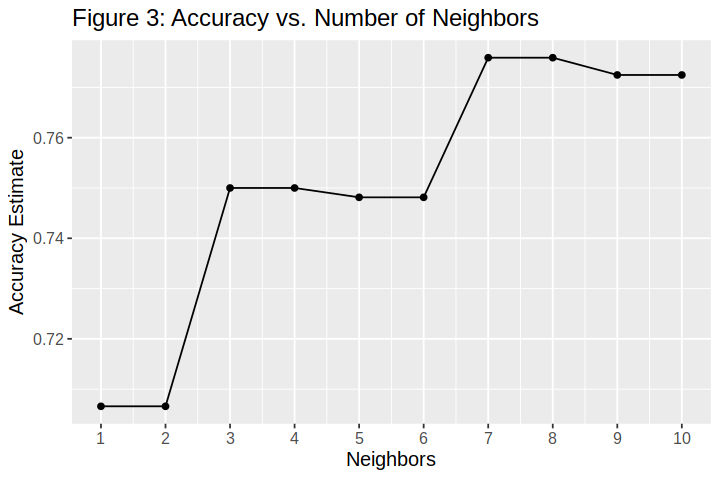

In [70]:
# Plotting the accuracy values for each K value under the best model using "bmi", "age", "glucose as predictor variables

options(repr.plot.width = 6, repr.plot.height = 4)
accuracy_vs_k <- diabetes_results_bmi_age_gl |> ggplot(aes(x = neighbors, y = mean)) +
                                                geom_point() +
                                                geom_line() +
                                                labs(x = "Neighbors", y = "Accuracy Estimate") +
                                                ggtitle("Figure 3: Accuracy vs. Number of Neighbors") +
                                                scale_x_continuous(breaks = seq(1, 11, by = 1)) +
                                                theme(text = element_text(size = 12))


accuracy_vs_k

Finally, after finding the model with the highest accuracy, we plot accuracy vs number of neighbors (Figure 3), which allows us to determine the optimal number of neighbors. A refined recipe is constructed with the selected variables, and a new specification model is built based on the optimal number of neighbors. This model is applied to the testing dataset for predictions, and accuracy, precision, and recall values are computed based on the confusion matrix, providing a comprehensive evaluation of our model's performance (Table 26, 27 and calculation followed after).

## Applying Best Model to the Testing Set

In [71]:
# Rebuild the recipe chosen and build the specifications and the fit model using the K value and recipe selected.


diabetes_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbor = 7) |>
                            set_engine("kknn") |>
                            set_mode("classification")


diabetes_recipe_bmi_age_gl <- recipe(`outcome` ~ `bmi` + `age` + `glucose` , diabetes_training) |>
                                    step_scale(all_predictors()) |>
                                    step_center(all_predictors())


diabetes_fit_bmi_age_gl <- workflow() |>
                                add_recipe(diabetes_recipe_bmi_age_gl) |>
                                add_model(diabetes_spec_final) |>
                                fit(data = diabetes_training)

# Applying the specification and recipe to the testing dataset for predictions 

diabetes_predictions <- diabetes_fit_bmi_age_gl |> 
                            predict(diabetes_testing) |> 
                            bind_cols(diabetes_testing)


diabetes_accuracy <- diabetes_predictions |> 
                        metrics(truth = `outcome`, estimate = `.pred_class`) |> 
                        filter(.metric == "accuracy")

diabetes_matrix <- diabetes_predictions |> 
                        conf_mat(truth = `outcome`, estimate = `.pred_class`)

diabetes_accuracy
diabetes_matrix

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7291667


           Truth
Prediction  Healthy Confirmed
  Healthy       102        29
  Confirmed      23        38

Table 26: Accuracy value for applying the best model on the testing dataset 

Table 27: Confusion matrix of best model for predicting diabetes

### Calculating the Precision and Recall Values

##### We are more interested in finding "Confirmed" cases within the Pima Indian females, hence we identify "Confirmed" as the "positive" label.


Precision = number of correct positive predictions/ total number of positive predictions

Precision = 38/(23+38) = 62.30


Recall = number of correct positive predictions/ total number of positive test set observations

Recall = 38/(38+29) = 56.72


# Expected Outcomes and Significance:

Through our extensive analysis, we have identified the most influential and accurate predictors for the analysis of diabetes in Pima Women: “bmi”, “age”, and “glucose”. These factors exhibited remarkable accuracy within the training data at 77.59% with K = 7 nearest neighbors. In the application of our model to the testing dataset, we achieved an accuracy of 72.92%. While our model doesn't serve as a definitive diagnostic tool, it proves to be a valuable preliminary indicator for the presence of diabetes within this specific demographic.

Delving into the nuances of our model's performance, our precision value stands at 62.30%. The precision value quantifies how many of the positive predictions (“Confirmed”) the classifier made were actually positive (“Confirmed”), we can trust that when predicting a new observation as a confirmed case of diabetes, it will be correctively identified as confirmed 62.30% of the time. This indicates the reliability of our model in correctly identifying confirmed diabetes cases. On the other hand, the recall value of 56.72%. The recall value quantifies how many of the positive observations (“Confirmed”) in the test set were identified as positive (“Confirmed”). In our best model, if there is an observation labelled as ‘Confirmed’ in the test data, we can trust that the classifier will find it 56.72% of the time. This highlights our model's capability to find confirmed cases in the test set. Striking a delicate balance between precision and recall, our model ensures a nuanced evaluation without compromising its effectiveness in practical applications where missing a diabetes diagnosis could have severe consequences.

Contrary to initial expectations, our findings, in line with research conducted by Yan et al. (2023), underscored the significant impact of BMI on our model's accuracy. While glucose levels and age were anticipated to be the primary predictors, the influence of BMI emerged as a noteworthy revelation. This aligns logically with the recognized link between increased body weight and the potential development of type II diabetes (Centers for Disease Control and Prevention [CDC], 2022).

Acknowledging the inherent challenge of achieving near-perfect accuracy in model development, the achieved accuracy nevertheless empowers professionals to initiate targeted interventions and personalized healthcare strategies for this at-risk population. It serves as a crucial initial step toward refining our understanding of diabetes prediction and intervention.

Considering the prevalence of diabetes in previously pregnant women within our dataset, a substantial portion of this outcome may be attributed to gestational diabetes, as gestational diabetes during pregnancies leads to type II diabetes 50% of the time (Centers for Disease Control and Prevention [CDC], 2022). Given the focus of our model on predicting type II diabetes, the diagnosis can prompt women who were previously pregnant to take necessary steps to check for gestational diabetes. The significance lies in the fact that gestational diabetes often lacks noticeable symptoms, making detection and catching gestational diabetes crucial to prevent potential complications for the newborn, such as premature birth, high birth weight, low blood sugar levels, and the subsequent risk of type II diabetes later in life (CDC, 2022).

Looking ahead, further discussion will be instrumental in exploring broader implications and expanding the scope of our investigation. What are the underlying mechanisms of diabetes during pregnancy that impact future generations? To what extent do external factors, including lifestyle choices and dietary patterns, contribute to diabetes in the community, and how can these findings be applied to public health initiatives aimed at reducing the overall burden of diabetes within indigenous communities? A more profound exploration of the root causes and impact of diabetes within the community will empower scientists to develop more specialized models, providing medical professionals with refined tools for accurate diagnosis and intervention. This holistic approach promises to redefine our understanding and strategies for addressing diabetes within this unique demographic. (Yan et al., 2023; CDC, 2022).

# References

Bashir, I. A, Mariod, A. A., Banu, R. & Elyas, T. B. (2019). Significance of Health Related Predictors of Diabetes in Pima Indians Women. Current Research in Nutrition and Food Science Journal, 7(2). http://dx.doi.org/10.12944/CRNFSJ.7.2.05

Centers for Disease Control and Prevention. (2022, December 30). Gestational Diabetes. https://www.cdc.gov/diabetes/basics/gestational.html

King, H., Rewers, M., & WHO Ad Hoc Diabetes Reporting Group. (1993). Global Estimates for Prevalence of Diabetes Mellitus and Impaired Glucose Tolerance in Adults. American Diabetes Association, 16(1), 157-177. https://diabetesjournals.org/care/article/16/1/157/20564/Global-Estimates-for-Prevalence-of-Diabetes

Yan, Z., Cai, M., Han, X., Chen, Q., &amp; Lu, H. (2023). The interaction between age and risk factors for diabetes and prediabetes: A community-based cross-sectional study. Diabetes, metabolic syndrome and obesity : targets and therapy. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9843502/ 

World Health Organization. (2023). Diabetes. https://www.who.int/news-room/fact-sheets/detail/diabetes
